# 
# Project: No Show Appointments

### Information from > 100k medical appointments in Brazil, with focus on "no show" appointments

> **Saverio Tufano** May 2021, Bedford, UK

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and focus on whether or not patients show up to their appointment. A number of characteristics about the patient are included in each row:
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital
- ‘Age’
- and more

Source:
> https://www.kaggle.com/joniarroba/noshowappointments

In [2]:
# Import packages and data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# understand dimensions of the dataset, column names
print('df rows and columns are:\n {}'.format(df.shape))
print('\ndf column names are:\n {}'.format(df.columns))
# print a preview
df.head()

df rows and columns are:
 (110527, 14)

df column names are:
 Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [175]:
# check data types
df.dtypes
# patientId is a float, but it could be an "int"
# dates are formatted as "string", they should be converted to datetime

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [176]:
# check for missing data
df.isna().sum()
# no missing data is detected

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [177]:
# check for duplicates
df.duplicated().sum()
# no duplicated row is detected

0

In [178]:
# check how many unique patients and how many unique appointments
print(df.PatientId.nunique())
print(df.AppointmentID.nunique())
# some patients have booked more than once, only one 

62299
110527


In [179]:
# check date format
print(df.AppointmentDay.tail(5))
# it appears dates need some cleaning, by splitting date and hour

110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, dtype: object


### Data Cleaning

In [180]:
# rename columns headers to standard convention: all lowercase and add underscore for readability
df.columns = ['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show']
# make all headers lowercase
df.columns = df.columns.str.lower()
# check results
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [181]:
# there are patients with multiple bookings, best to delete them
# the choice of keeping the first line of the dataset is arbitrary
df.drop_duplicates(subset = 'patient_id', keep = 'first', inplace = True)
# confirm new dataframe shape
df.shape

(62299, 14)

In [182]:
# convert PatientId to int
df['patient_id'] = df['patient_id'].astype(int)
# and confirm the chance 
df['patient_id'].head()

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: patient_id, dtype: int64

In [183]:
# convert the two date-time columns to date time and split the date from the time
# I will create 2 dummy variables. It makes the code longer but gives me more confidence on the results
df['appointment_day2'] = df['appointment_day'] 
df['scheduled_day2'] = df['scheduled_day'] 

df['appointment_day'] = pd.to_datetime(df['appointment_day2'], format="%Y-%m-%dT%H:%M:%SZ").dt.date
df['appointment_time'] = pd.to_datetime(df['appointment_day2'], format="%Y-%m-%dT%H:%M:%SZ").dt.time

df['scheduled_day'] = pd.to_datetime(df['scheduled_day2'], format="%Y-%m-%dT%H:%M:%SZ").dt.date
df['scheduled_time'] = pd.to_datetime(df['scheduled_day2'], format="%Y-%m-%dT%H:%M:%SZ").dt.time
# check the results
df.head(2)
# drop duplicated date columns
df.drop(columns=['scheduled_day2', 'appointment_day2'], axis = 1, inplace = True)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_time,scheduled_time
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,00:00:00,18:38:08
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,00:00:00,16:08:27


In [199]:
# create a column based on "no show". Yes = no show = 1, No = show = 0
# It will allow to manage the metrics for EDA
df['no_show'].unique()
df['no_show_int'] = df['no_show'].map({'Yes': 1, 'No': 0}).astype(int)
df['no_show_int'].unique()

array([0, 1])

In [210]:
# finally, save the data
df.to_csv('no_show_appointments_clean.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

We will explore the relationship between each of the variables in the dataset and the show/no-show appointments

### Check the overall no-show ratio

In [200]:
# let's check the no-show ratio
print('The no-show ratio is {} %'.format(round(df['no_show_int'].mean(),3)*100))

The no-show ratio is 19.6 %


### Explore correlation with gender
> Hypothesis: a certain gender is more likely to a "no show" at hospital appointments

In [186]:
# check the split between gender
print('the number of female and male patients is respectively:\n{}'.format(df.gender.value_counts()))

the number of female and male patients is respectively:
F    40046
M    22253
Name: gender, dtype: int64


In [187]:
# check if there is any correlation between no show and gender
df.groupby('gender').no_show_int.mean()
# results below show no significant difference for no show between different gender

gender
F    0.195475
M    0.196153
Name: no_show_int, dtype: float64

### Explore correlation with neighborough
> Hypothesis: certain hospitals (neighborhood) are more likely to get a "no show" at a scheduled appointment

In [202]:
### check the split between neighborougs
print('The patient split by neighborough is the following::\n{}'.format(df.neighbourhood.value_counts()))
# set number of patients for the first i most represented neighbourhoods 
# some neighbourhoods have small number of patients, hence we will set n = 100 as cutoff value
neigh_ind = df.neighbourhood.value_counts().loc[lambda x: x>100].index

The patient split by neighborough is the following::
JARDIM CAMBURI                 4192
MARIA ORTIZ                    3336
JARDIM DA PENHA                2406
RESISTÊNCIA                    2373
ITARARÉ                        2136
                               ... 
ILHA DO BOI                      22
AEROPORTO                         7
ILHA DO FRADE                     5
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64


In [189]:
# group the hospitals by neighbourhood and compute the ratio of "no show" appointments
neigh_no_show = df.loc[df.neighbourhood.isin(neigh_ind)].groupby('neighbourhood').no_show_int.mean()
neigh_no_show.describe()

count    71.000000
mean      0.199958
std       0.038296
min       0.142549
25%       0.170077
50%       0.194825
75%       0.222419
max       0.336634
Name: no_show_int, dtype: float64

### Explore relation to age
##### Hypothesis
> certain age groups are more likely to "no show" at an appointment

It requires creation of age bins

In [204]:
# Firstly check the age range of data
df['age'].describe()
# some show an age of -1, maybe they related to antenatal hospital checks/visits
# for the sake of this investigation, we will ignore those

count    62299.000000
mean        36.704891
std         23.531372
min         -1.000000
25%         17.000000
50%         36.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

In [206]:
# create 5 bins
import numpy as np
bin_age = np.linspace(0,100,6)
bin_name = ['0 to 20', '20 to 40', '40 to 60', '60 to 80', '80 to 100']
bin_name

['0 to 20', '20 to 40', '40 to 60', '60 to 80', '80 to 100']

In [207]:
df['age_rank'] = pd.cut(df['age'], bin_age, labels = bin_name)
# df.head(20)

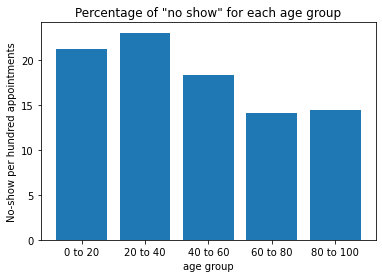

In [208]:
# bar chart showing the ratio of no show for each age group
plt.bar(df.groupby('age_rank').no_show_int.mean().index, df.groupby('age_rank').no_show_int.mean()*100)
plt.title('Percentage of "no show" for each age group')
plt.xlabel('age group')
plt.ylabel("No-show per hundred appointments");


### Time Elapsed
> Hypothesis: the more time passess between scheduling and the appointment, the more likely the patient not to show

In [194]:
# calculate the time elapsed between scheduling and the actual appointment
df['waiting_time'] = df['appointment_day'] - df['scheduled_day']
# convert the column into integerù
df['waiting_time'] = df['waiting_time'].dt.days.astype(int)

In [195]:
# in the same fashion as the previous exploration, let's split the dataset in bins
bin_wait = np.array([-1.0, 4.0, 17.0, 179.0])
bin_wait_name = ['same day to 4', '4 to 17 days', 'more than 17 days']
df['waiting_time_bin'] = pd.cut(df['waiting_time'], bin_wait, labels = bin_wait_name)
bin_wait

array([ -1.,   4.,  17., 179.])

In [196]:
#df.head(30)

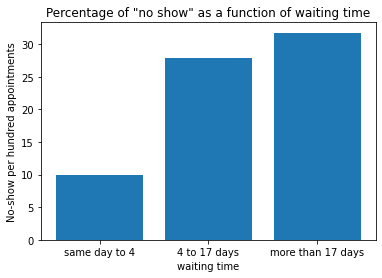

In [197]:
plt.bar(df.groupby('waiting_time_bin').no_show_int.mean().index, df.groupby('waiting_time_bin').no_show_int.mean()*100)
plt.title('Percentage of "no show" as a function of waiting time')
plt.xlabel('waiting time')
plt.ylabel("No-show per hundred appointments");


<a id='conclusions'></a>
## Conclusions of EDA

### Correlation with gender
> From the simple test run, no apparent correlation was found

### Correlation with neighbourhood (hospital location)
> There is a large difference between certain hospitals (from 14% "no show" of the "best" up to 34% of the worst).
A better knowledge of the hospital characteristics could lead to interesting findings on the causes of no shows.

### Correlation with age
> The plot shows a certain level of correlation between "no show" and age of the patient, with younger ages tending to miss more frequently hospital appointments.

### Correlation with waiting time
> There is an apparent correlation between the time elapsed from the initial booking to the appointment date and the no-show ratio.
> Interestingly, the no-show ratio jumps
> - from 10% in the case in which the appointment is booked in within 4 days
> - to more than 25% when it is booked between 4 and 17 days from the setting day